In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import random_split
from torchtext.vocab import build_vocab_from_iterator
from sklearn.model_selection import train_test_split
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')

In [89]:
tkDF = pd.read_csv('DATA/TABLES/경상도.csv')

In [90]:
tkDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95594 entries, 0 to 95593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사투리     95594 non-null  object
 1   표준어     95594 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [91]:
tkDF.head(20)

,사투리,표준어
0,지난달 그 지난달에는 그의 거기가 어딘지 내가 그곳을 말을 모르는데 그 정신이 들에...,지난달 그 지난달에는 그의 거기가 어딘지 내가 그곳을 말을 모르는데 그 정신이 들에...
1,힘들어요 농사 짓는 거는 힘들고 요즘은 기계가 좋아 가지고 농사 짓기가 수월하지만도...,힘들어요 농사 짓는 거는 힘들고 요즘은 기계가 좋아 가지고 농사 짓기가 수월하지만 ...
2,더운 삼계탕 겉은 거는 더울 때 묵을 때는 좋지예 좋은데 묵고 나면 사람이 속도 편...,더운 삼계탕 같은 거는 더울 때 먹을 때는 좋지요 좋은데 먹고 나면 사람이 속도 편...
3,장 보러 가다가 비가 마이 오길래 밭두럼 엉개질까봐 밭에 가보는 길이시더,장 보러 가다가 비가 많이 오길래 밭두렁 무너질까봐 밭에 가보는 길입니다
4,비가 오니까 집에 어데 누전이 되는가 그건 한번 되더라고예 그래 정전될 때는 인자 ...,비가 오니까 집에 어디 누전이 되는가 그건 한번 되더라구요 그래 정전될 때는 인제 ...
5,우리 집에서 불편한 점은 없는데 아 그기 저기 기차역이 지나가니까 시끄러워 가지고 ...,우리 집에서 불편한 점은 없는데 아 거기 저기 기차역이 지나가니까 시끄러워 가지고 ...
6,부추는 부산 말로 정구지 아이가 정구지는 지짐을 해 먹으면은 제일 좋은데 그게 비가...,부추는 부산 말로 부추 아닌가요 부추는 전을 해 먹으면은 제일 좋은데 그게 비가 좀...
7,이 구두 하나만 계속 신고 다니니께 인자 굽이 딿아서 갈아야 되겠네,이 구두 하나만 계속 신고 다니니까 이제 굽이 닳아서 갈아야 되겠네
8,부추 우리 말로 정구지라고 하는데 정구지는 딱 보면은 부침개 해가지고 정구지 전 구...,부추 우리 말로 부추라고 하는데 부추는 딱 보면은 부침개 해가지고 부추 전 구워가지...
9,요즘 몸에 좋은 거는 별 보조식품은 없는데 인제 주로 버섯 같은 거 좀 많이 먹고 ...,요즘 몸에 좋은 거는 별 보조식품은 없는데 인제 주로 버섯 같은 거 좀 많이 먹고 ...


In [92]:
tkDF = pd.melt(tkDF)

In [93]:
tkDF = tkDF.sample(frac=1).reset_index(drop=True)

In [94]:
tkDF['variable'].values

array(['사투리', '사투리', '사투리', ..., '사투리', '사투리', '사투리'], dtype=object)

In [95]:
tkDF

,variable,value
0,사투리,옷에 기름도 묻고 너무 추저바가 마이 빨았는디 와 이리 때가 안 지노
1,사투리,몸을 따뜻하게 하고 생강이나 대추물을 끓이가 먹고 푹 쉬면은 빨리 나을 것 겉애 약...
2,사투리,저희 아버지 어머이는 보면은 아버지는 공무원으로 계속 계셨기 때문에 농사 짓는 것도...
3,사투리,상처 났을 때 무신 가루를 말리가지고 바른다캤는디 그게 뭡니껴
4,표준어,초봄이나 안 그러면 농사 짓기 전 겨울에 약초를 캐러 가신다고요
...,...,...
191183,사투리,방이나 마리에 다 신이 있다 카던디 정지에도 신이 있었습니껴
191184,표준어,어제 우리가 꿀밥 안 먹었어 꿀밥 먹고 그래서 배가 좀 고프고 나중에는 그 뭐야 콩...
191185,사투리,캐나다에 있는 오빠가 아버지 다음에 오빠인데 너무 그리워하는데 결혼을 하다 보니까 ...
191186,사투리,저는 자녀는 한 명 정도가 적당하다고 생각해요 요즘 사람 살아가기가 상당히 버겁 맞...


In [96]:
import string

tkDF['value'] = tkDF['value'].replace(r'[{}]'.format(string.punctuation), '', regex=True)

In [97]:
tkDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191188 entries, 0 to 191187
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  191188 non-null  object
 1   value     191188 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


In [98]:
class CustomDataset(Dataset):
    def __init__(self, xdata, ydata):
        super().__init__()
        self.text = list(xdata.values) if isinstance(xdata, pd.DataFrame) else list(xdata)
        self.label = [1 if value == '사투리' else 0 for value in ydata.values] if isinstance(ydata, pd.DataFrame) else [1 if value == '사투리' else 0 for value in ydata]

    def __len__(self): 
        return len(self.text)
    
    def __getitem__(self, idx):
        return self.label[idx], self.text[idx]


In [99]:
tkDS = CustomDataset(tkDF.value,tkDF.variable)
len(tkDS)

191188

In [100]:
X_train, X_test, y_train, y_test = train_test_split(tkDF.value,tkDF.variable  , test_size=0.2, random_state=42, stratify=tkDF.variable)

In [101]:
trainDS = CustomDataset(X_train, y_train)
valDS = CustomDataset(X_test, y_test)

In [102]:
pd.DataFrame(trainDS.label).value_counts()

0    76475
1    76475
dtype: int64

In [103]:
pd.DataFrame(valDS.label).value_counts()

0    19119
1    19119
dtype: int64

In [104]:
# train_length = int(0.8 * len(tkDS))
# val_length = len(tkDS) - train_length
# trainDS, valDS = random_split(tkDS, [train_length, val_length])

In [105]:
# 토큰 관련 특별 문자
unk = '<UNK>'
pad = '<PAD>'

In [106]:
from konlpy.tag import Mecab
mecab = Mecab()

In [107]:
# 한글 불용어 제거 # 어근 제거는 안함 - 사투리와 표준어 구별 사라짐
def torkenizer(text):
    # with open('DATA/hangul_stopword.txt', 'r', encoding='utf-8') as f:
    #     stopword_h = {line.strip() for line in f.readlines()} 
    token = mecab.morphs(text)
    # token = [word for word in token if word not in stopword_h] 
    return token


In [108]:
def yield_tokens(data_iter):
    for label, text in data_iter:
        yield torkenizer(text)

In [109]:
# !pip3 install mecab-ko-msvc mecab-ko-dic-msvc

In [110]:
VOCAB = build_vocab_from_iterator(yield_tokens(trainDS), specials=[unk, pad], special_first=True)

VOCAB.set_default_index(VOCAB[unk])

In [155]:
import pickle

# 저장할 파일 이름
filename = "vocab_tk.pkl"

# 어휘 사전 저장
with open(filename, "wb") as f:
    pickle.dump(VOCAB, f)

In [112]:
VOCAB(['마'])

[170]

In [113]:
# 텍스트 > 정수 인코딩
text_pipeline = lambda x: VOCAB(torkenizer(x))

In [114]:
# 인코딩
token2id = {label: id for id, label in enumerate(VOCAB.get_itos())}
# 디코딩
id2token = {id: label for id, label in enumerate(VOCAB.get_itos())}

In [115]:
# 배치 크기 만큼 데이터셋 반환 함수
def collate_batch(batch):

    label_list, text_list, offsets = [], [], [0] 

    for (_label, _text) in batch:

        label_list.append(_label)

        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)

        offsets.append(processed_text.size(0))

    # 텐서화 진행
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0) # 누적값 -> 전체 갯수
    text_list = torch.cat(text_list)
    
    return label_list.to(DEVICE), text_list.to(DEVICE), offsets.to(DEVICE)

In [116]:
BATCH_SIZE = 16384
trainDL = DataLoader(trainDS, batch_size=BATCH_SIZE, collate_fn=collate_batch, num_workers=64)
testDL = DataLoader(valDS, batch_size=BATCH_SIZE, collate_fn=collate_batch, num_workers=64)

In [117]:
NUM_CLASSE = 1
VOCAB_SIZE = len(VOCAB)
NUM_LAYER = 1
print(f'NUM_CLASSES: {NUM_CLASSE} VOCAB_SIZE: {VOCAB_SIZE}')

NUM_CLASSES: 1 VOCAB_SIZE: 35892


In [146]:
class TextModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_class):
        super(TextModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, sparse=False)
        self.rnn = nn.GRU(embedding_dim, hidden_size, NUM_LAYER, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(p=0.2) 
        self.fc = nn.Linear(hidden_size * 2, num_class)  
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        output, hidden = self.rnn(embedded)
        output = self.dropout(output)
        output = self.fc(output)
        return output

In [147]:
HIDDEN_SIZE = 3
EMBEDDING_DIM = 64
VOCAB_SIZE = len(VOCAB)
EPOCHS = 30
LR = 0.01

In [148]:
# 학습 관련 인스턴스
MODEL = TextModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_SIZE, NUM_CLASSE).to(DEVICE)

CRITERION = nn.BCEWithLogitsLoss()
OPTIMIZER = torch.optim.Adam(MODEL.parameters(), lr=LR)
SCHEDULER = torch.optim.lr_scheduler.ReduceLROnPlateau(OPTIMIZER)

In [149]:
from torchmetrics.classification import BinaryF1Score

In [150]:
def train(model, DL, loss_fn, optimizer):
    model.train()
    lossList = []

    f1 = BinaryF1Score()

    for label, text, offset in DL: 
        label = label.to(DEVICE)
        text = text.to(DEVICE)  
        offset = offset.to(DEVICE)
        
        output = model(text, offset)

        target = label.unsqueeze(1).float()  # [배치 크기, 1] 형태로 변환
        
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        lossList.append(loss.item())
        
        f1(output, target)

    train_loss = np.mean(lossList)
    train_f1 = f1.compute().cpu().item()

    print(f'[Train loss] ==> {train_loss:.4f}    [Train F1 Score] ==> {train_f1:.4f}')
    return train_loss, train_f1

In [151]:
def evaluate(model, DL, loss_fn):
    model.eval()
    losses = []
    
    f1 = BinaryF1Score()

    with torch.no_grad():
        for label, text, offset in DL: 
            label = label.to(DEVICE)
            text = text.to(DEVICE)
            offset = offset.to(DEVICE)
            
            output = model(text, offset)

            
            target = label.unsqueeze(1).float()  # [배치 크기, 1] 형태로 변환
            
            loss = loss_fn(output, target)
            losses.append(loss.item())

            f1(output, target)
        
    val_loss = np.mean(losses)
    val_f1 = f1.compute().cpu().item()

    print(f'[Valid loss] ==> {val_loss:.4f}    [Valid F1 Score] ==> {val_f1:.4f}')
    return val_loss, val_f1

In [152]:
def predict(model, text, text_pipeline):
    with torch.no_grad():
        # 토큰화 > 정수 변환 > 텐서
        text = torch.tensor(text_pipeline(text), dtype=torch.int64).to(DEVICE)
        text = text.unsqueeze(0)
        offsets = torch.tensor([0]).DEVICE       
        predicted_label = model(text, offsets)
        return predicted_label.argmax(1).item() + 1

In [153]:
def grahp(train_report,val_report):
    fig, ax1 = plt.subplots()  # fig는 그래프 객체

    # 손실 그래프 그리기
    ax1.plot(train_report[0], label='Train Loss', color='red')
    ax1.plot(val_report[0], label='Validation Loss', color='orange')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')
    
    # 정확도 그래프 그리기
    ax2 = ax1.twinx()
    ax2.plot(train_report[1], label='Train F1 Score', color='blue')
    ax2.plot(val_report[1], label='Validation F1 Score', color='green')
    ax2.set_ylabel('F1 Score')
    ax2.set_xlabel('Epoch')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper right')
    
    plt.xlabel('Epoch')  # 전체 그래프의 x축 라벨 설정
    plt.title('Train & Validation Scores')
    plt.show()

In [154]:
# 학습 및 검증 진행
train_ = [[],[]]
test_ = [[],[]]

min_loss = float('inf')

for epoch in range(1, EPOCHS+1):
    print(f'[Epoch {epoch}/{EPOCHS}]')
    train_loss, train_f1 = train(MODEL, trainDL, CRITERION, OPTIMIZER)
    val_loss, val_f1 = evaluate(MODEL, testDL, CRITERION)

    train_[0].append(train_loss)
    train_[1].append(train_f1)
    test_[0].append(val_loss)
    test_[1].append(val_f1)

    SCHEDULER.step(val_loss)

    if min_loss > val_loss:
        min_loss = val_loss
        torch.save(MODEL, 'model_tkLang.pt')
    if SCHEDULER.num_bad_epochs >= SCHEDULER.patience:
        print(f'Early Stopping at {epoch}')
        break

[Epoch 1/30]
[Train loss] ==> 0.6723    [Train F1 Score] ==> 0.5801
[Valid loss] ==> 0.6301    [Valid F1 Score] ==> 0.7426
[Epoch 2/30]
[Train loss] ==> 0.5686    [Train F1 Score] ==> 0.7722
[Valid loss] ==> 0.4884    [Valid F1 Score] ==> 0.7971
[Epoch 3/30]
[Train loss] ==> 0.4293    [Train F1 Score] ==> 0.8190
[Valid loss] ==> 0.3809    [Valid F1 Score] ==> 0.8238
[Epoch 4/30]
[Train loss] ==> 0.3506    [Train F1 Score] ==> 0.8441
[Valid loss] ==> 0.3489    [Valid F1 Score] ==> 0.8376
[Epoch 5/30]
[Train loss] ==> 0.3159    [Train F1 Score] ==> 0.8612
[Valid loss] ==> 0.3407    [Valid F1 Score] ==> 0.8422
[Epoch 6/30]
[Train loss] ==> 0.2930    [Train F1 Score] ==> 0.8728
[Valid loss] ==> 0.3398    [Valid F1 Score] ==> 0.8422
[Epoch 7/30]
[Train loss] ==> 0.2771    [Train F1 Score] ==> 0.8809
[Valid loss] ==> 0.3433    [Valid F1 Score] ==> 0.8388
[Epoch 8/30]
[Train loss] ==> 0.2664    [Train F1 Score] ==> 0.8865
[Valid loss] ==> 0.3422    [Valid F1 Score] ==> 0.8385
[Epoch 9/30]
[Tr

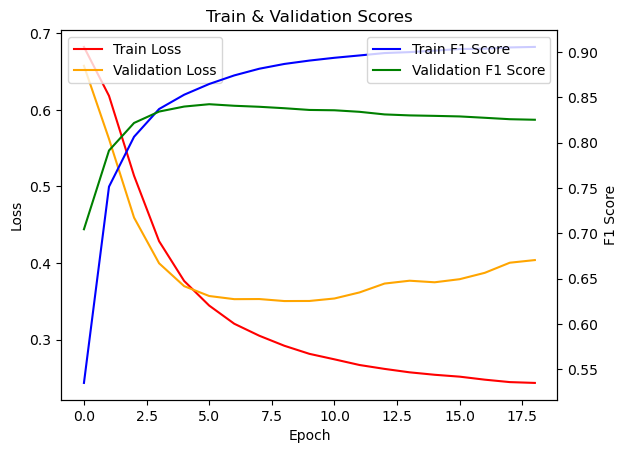

In [ ]:
grahp(train_,test_)